Enter the name of your province: Ontario
The name of your region is: Toronto


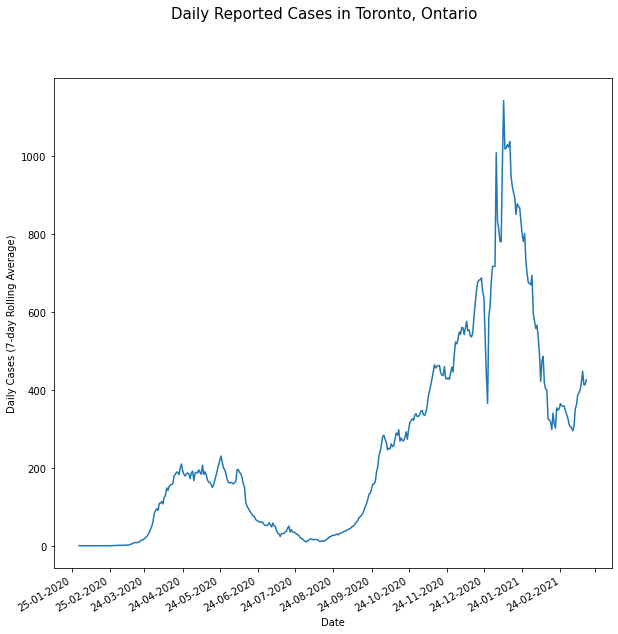

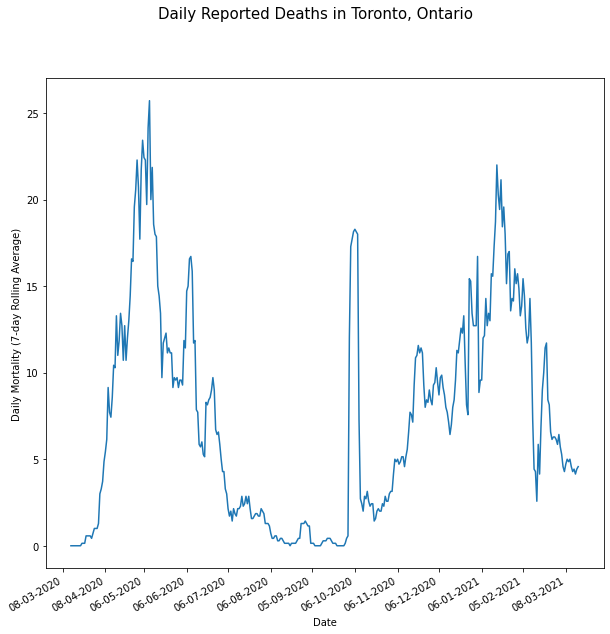

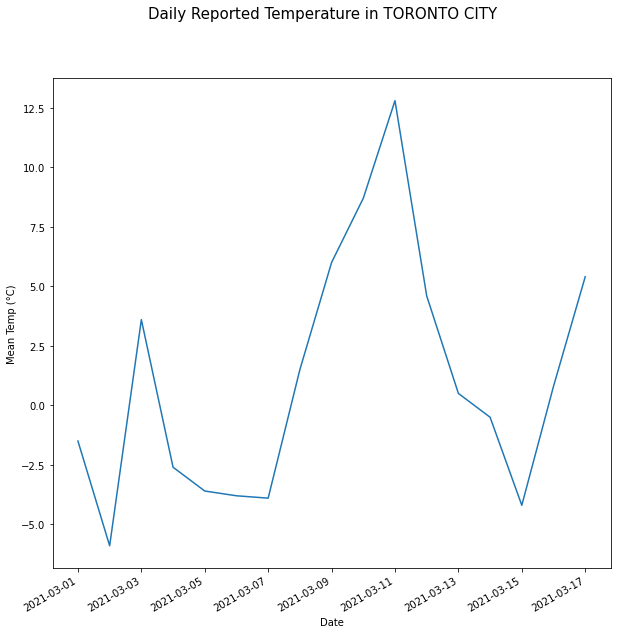

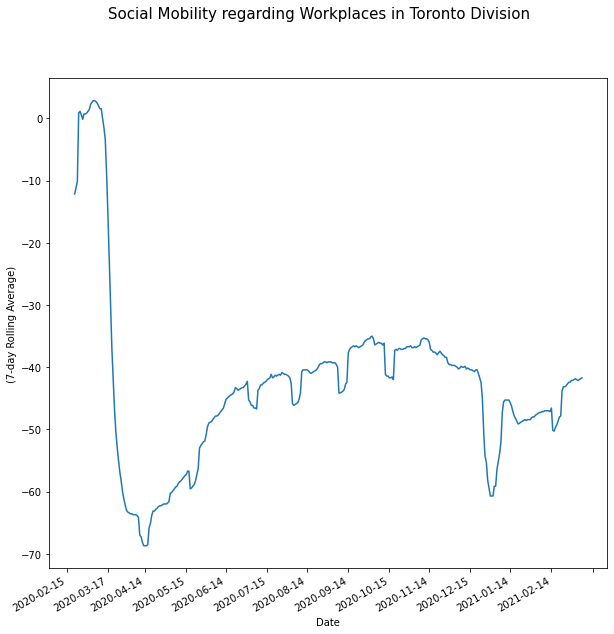

In [33]:
# Plots cases, mortality, workplace mobility and the weather of the current month

# Packages needed to make the code function
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tkinter import *
import datetime as dt

# Reads the raw data from the Github URL for COVID-19 mortality
df_mort = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_hr/mortality_timeseries_hr.csv')

# Reads the raw data from the Github URL for COVID-19 cases
df_cases = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_hr/cases_timeseries_hr.csv')

# Takes the dates from the mortality dataframe
def date_mort(province_name, region_name):
    dfmort_province = df_mort[df_mort.province == province_name]
    return dfmort_province.date_death_report[dfmort_province.health_region == region_name]

# Takes the mortality data from the mortality dataframe
# and converts it into a 7 day rolling average 
def ravg_mort(province_name, region_name):
    dfmort_province = df_mort[df_mort.province == province_name]
    return dfmort_province.deaths[dfmort_province.health_region == region_name].rolling(window=7).mean()

# Plots the data from date_mort() and ravg_mort()
def plot_mort(region_name, province_name):
    
    # Creates figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.plot(date_mort(province_name, region_name),ravg_mort(province_name, region_name))
    
    # Sets the title and labels for axes      
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Daily Mortality (7-day Rolling Average)', fontsize=10)
    plt.suptitle('Daily Reported Deaths in '+region_name+', '+province_name, fontsize=15)

    # Sets ticks every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
 
    # Rotates and right aligns the x labels 
    fig.autofmt_xdate()
    return fig

def date_cases(province_name, region_name):
    dfcases_province = df_cases[df_cases.province == province_name]
    return dfcases_province.date_report[dfcases_province.health_region == region_name]

def ravg_cases(province_name, region_name):
    dfcases_province = df_cases[df_cases.province == province_name]
    return dfcases_province.cases[dfcases_province.health_region == region_name].rolling(window=7).mean()

def plot_cases(region_name, province_name):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.plot(date_cases(province_name, region_name),ravg_cases(province_name, region_name))
          
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Daily Cases (7-day Rolling Average)', fontsize=10)
    plt.suptitle('Daily Reported Cases in '+region_name+', '+province_name, fontsize=15)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
 
    fig.autofmt_xdate()
    return fig

# Opens the .csv file listed used to hold the climate ID
# and province abbreviation that corresponds to the health_region
weat_info = pd.read_csv(r'C:\Users\shafi\Downloads\COVID-19 CANADIAN DASHBOARD\health_regions_weather.csv')

# Gets the climate ID for the health region
def climateid(province_name, region_name):
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.climate_id[weat_info_province.health_region == region_name].item()

# Gets the province abbreviation for the health region
def provinceid(province_name, region_name):
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.prov_id[weat_info_province.health_region == region_name].item()

# Gets the weather station name for the health region
def weatregion(province_name, region_name):
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.temp_region[weat_info_province.health_region == region_name].item()

def get_subregion(province_name, region_name):
    
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.sub_region_2[weat_info_province.health_region == region_name].item()

def mobility(province_name, region_name):
    
    weat_info_province = weat_info[weat_info.province_name == province_name]
    sub_region = weat_info_province.sub_region_2[weat_info_province.health_region == region_name].item()
   
    return mobility_info.workplaces_percent_change_from_baseline[mobility_info.sub_region_2 == sub_region].rolling(window=7).mean()

def date_mob(province_name, region_name):
    
    weat_info_province = weat_info[weat_info.province_name == province_name]
    sub_region = weat_info_province.sub_region_2[weat_info_province.health_region == region_name].item()
    
    return mobility_info.date[mobility_info.sub_region_2 == sub_region]
    
def plot_mob(region_name, province_name):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.plot(date_mob(province_name, region_name),mobility(province_name, region_name))
    
    
    # On the page with the Google Mobility Data, the data is graphed in percentages from the baseline
    # (median value, for the corresponding day of the week, during the 5-week period)
    # I haven't figured out how to do this so currently I have this function plot the 
    # values in the .csv file as a 7-day rolling average
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Mobility for Workplaces (7-day Rolling Average)', fontsize=10)
    plt.suptitle('Social Mobility Regarding Workplaces in '+get_subregion(province_name,region_name), fontsize=15)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    fig.autofmt_xdate()
    return fig

province_name = input("Enter the name of your province: ")

# Options for the options menu
# Omitted "Repatriated" from the Options List
if province_name == "Alberta":
    OptionList = ["Calgary","Central","Edmonton",
                  "North","Not Reported","South",]

elif province_name == "British Columbia":
    province_name = "BC"
    OptionList = ["Fraser","Interior","Island",
                  "Northern","Not Reported","Vancouver Coastal",]

elif province_name == "Manitoba":
    OptionList = ["Interlake-Eastern","Northern","Not Reported",
                  "Prairie Mountain","Southern Health","Winnipeg",]

elif province_name == "New Brunswick":
    OptionList = ["Not Reported","Zone 1 (Moncton area)","Zone 2 (Saint John area)",
                  "Zone 3 (Fredericton area)","Zone 4 (Edmundston area)",
                  "Zone 5 (Campbellton area)","Zone 6 (Bathurst area)","Zone 7 (Miramichi area)",]

elif province_name == "Newfoundland and Labrador":
    province_name = "NL"
    OptionList = ["Central","Eastern","Labrador-Grenfell",
                  "Not Reported","Western",]

elif province_name == "Nova Scotia":
    OptionList = ["Not Reported","Zone 1 - Western","Zone 2 - Northern",
                  "Zone 3 - Eastern","Zone 4 - Central",]

elif province_name == "Nunavut":
    OptionList = ["Nunavut",]
    
elif province_name == "Northwest Territories":
    province_name = "NWT"
    OptionList = ["NWT",]

elif province_name == "Ontario":
    OptionList = ["Algoma","Brant","Chatham-Kent","Durham","Eastern","Grey Bruce","Haldimand-Norfolk", 
                  "Haliburton Kawartha Pineridge","Halton","Hamilton","Hastings Prince Edward",
                  "Huron Perth","Kingston Frontenac Lennox & Addington","Lambton",
                  "Leeds Grenville and Lanark","Middlesex-London","Niagara","North Bay Parry Sound",
                  "Northwestern","Not Reported","Ottawa","Peel","Peterborough","Porcupine",
                  "Renfrew","Simcoe Muskoka","Southwestern","Sudbury","Thunder Bay","Timiskaming",
                  "Toronto","Waterloo","Wellington Dufferin Guelph","Windsor-Essex","York",]

elif province_name == "Prince Edward Island":
    province_name = "PEI"
    OptionList = ["Prince Edward Island",]
    
elif province_name == "Quebec":
    OptionList = ["Abitibi-Témiscamingue","Bas-Saint-Laurent","Capitale-Nationale",
                  "Chaudière-Appalaches","Côte-Nord","Estrie","Gaspésie-Îles-de-la-Madeleine",
                  "Lanaudière","Laurentides","Laval","Mauricie","Montérégie",
                  "Montréal","Nord-du-Québec","Not Reported","Nunavik",
                  "Outaouais","Saguenay","Terres-Cries-de-la-Baie-James",]
    
elif province_name == "Saskatchewan":
    OptionList = ["Central","Far North","North","Not Reported",
                  "Regina","Saskatoon","South",]

elif province_name == "Yukon":
    OptionList = ["Yukon",]

def selected(event):
    MyLabel = Label(win, text="The selected region is: "+clicked.get()).pack()   
    
# Creates the window
win = Tk()

# Sets size of the window
win.geometry("400x400")

# Sets title of the window
win.title("COVID-19 Mortality")

clicked = StringVar()
clicked.set(OptionList[0])

# Creates the Option Menu
dropmenu = OptionMenu(win, clicked, *OptionList,command=selected)
dropmenu.pack(padx=10,pady=20)

win.mainloop()

print("The name of your region is: "+clicked.get())
plot_cases(clicked.get(), province_name)
plot_mort(clicked.get(), province_name)
plt.show()

base_url = 'https://dd.weather.gc.ca/climate/observations/daily/csv/'

current_date = dt.datetime.today()
date = current_date.strftime("%Y-%m")

prov_id = provinceid(province_name, clicked.get())
climate_id = climateid(province_name, clicked.get())

target_url = base_url + prov_id + '/climate_daily_' + prov_id+ '_' +climate_id+ '_' +date+ '_P1D.csv'
weat_data =  pd.read_csv(target_url, encoding='Latin-1')

weat_city = weat_data['Mean Temp (°C)']
date_city = weat_data['Date/Time']

weat_data =  pd.read_csv(target_url, encoding='Latin-1')

weat_city = weat_data['Mean Temp (°C)']
date_city = weat_data['Date/Time']

# Plots the weather data from weat_city and date_city
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(date_city, weat_city)
          
plt.xlabel('Date', fontsize=10)
plt.ylabel('Mean Temp (°C)', fontsize=10)
plt.suptitle('Daily Reported Temperature in '+weatregion(province_name, clicked.get()), fontsize=15)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.show()

plot_mob(clicked.get(), province_name)
plt.show()

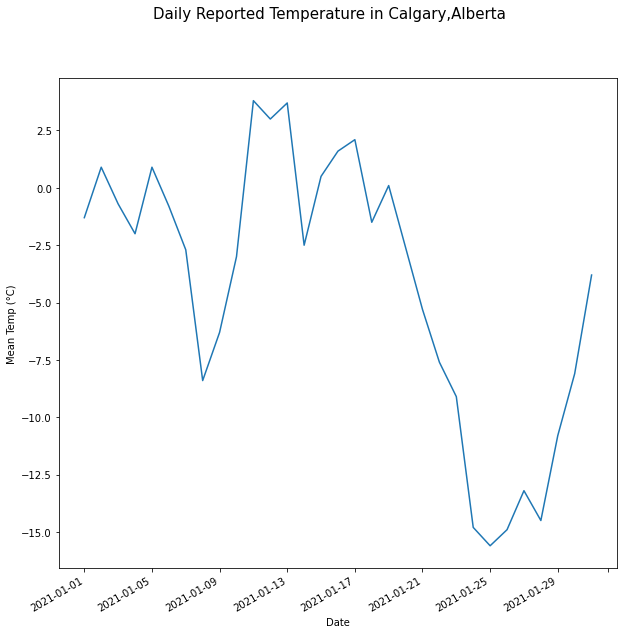

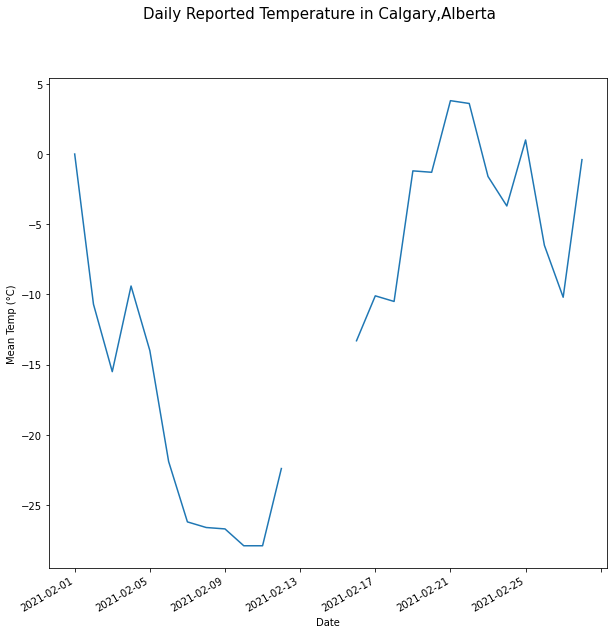

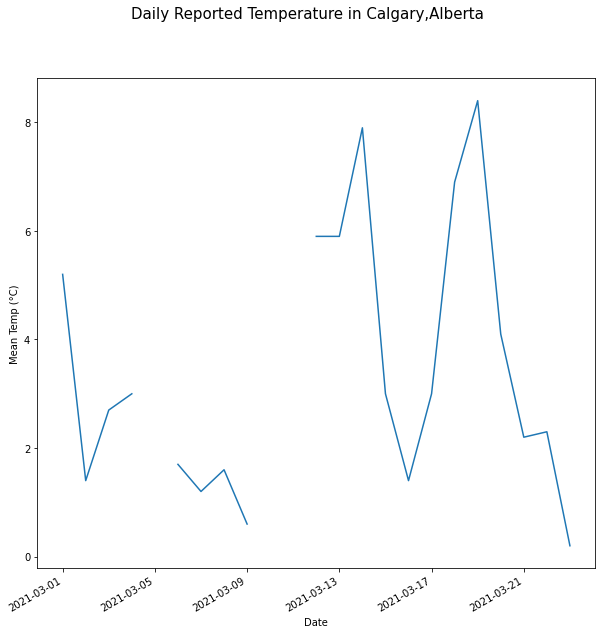

In [4]:
# Plots all the weather data for 2021 for a health region 
# but currently doesn't combine the data from the .csv files (several graphs)

import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tkinter import *
import datetime as dt
from dateutil.relativedelta import relativedelta

# Test values
province_name = 'Alberta'
region_name = 'Calgary'

# Opens the text file in lines
weat_info = pd.read_csv(r'C:\Users\shafi\Downloads\COVID-19 CANADIAN DASHBOARD\health_regions_weather.csv')

def climateid(province_name, region_name):
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.climate_id[weat_info_province.health_region == region_name].item()

def provinceid(province_name, region_name):
    weat_info_province = weat_info[weat_info.province_name == province_name]
    return weat_info_province.prov_id[weat_info_province.health_region == region_name].item()

base_url = 'https://dd.weather.gc.ca/climate/observations/daily/csv/'
start_dt = dt.datetime(2020, 12, 31)
end_dt = dt.datetime.today()

delta = relativedelta(months=1)

while start_dt <= end_dt:
    start_dt += delta
   
    date_rang = start_dt.strftime("%Y-%m")
    
    target_url = base_url + provinceid(province_name, region_name) + '/climate_daily_' +provinceid(province_name, region_name)+ '_' +climateid(province_name, region_name)+ '_' +date_rang+ '_P1D.csv'

    weather_data = pd.read_csv(target_url, encoding='Latin-1')
    
    weather_annual = pd.concat([weather_data['Mean Temp (°C)']], ignore_index=True)
    weather_date = pd.concat([weather_data['Date/Time']], ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.plot(weather_date, weather_annual)
          
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Mean Temp (°C)', fontsize=10)
    plt.suptitle('Daily Reported Temperature in '+region_name+ ','+province_name, fontsize=15)

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    fig.autofmt_xdate()
